<a href="https://colab.research.google.com/github/mariaeduardagimenes/NLP/blob/master/Tutorial_NLP_TCC_CleanEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning


## Introduction


Este notebook passa por uma etapa necessária de qualquer projeto de ciência de dados - limpeza de dados. A limpeza de dados é uma tarefa demorada, e por vezes complicada, porém, muito importante. Devemos ter sempre em mente que "garbage in, garbage out". Ou seja, dados sujos como input em um modelo retornará resultados sem sentido.
Especificamente, vamos examinar:

1. Coletar os dados - neste caso, coletaremos dados de um blog de um site
2. Limpando os dados - examinaremos técnicas populares de pré-processamento de texto
3. Organizando os dados - organizaremos os dados limpos de uma forma que seja fácil de inserir em outros algoritmos

A saída deste notebook será dados limpos e organizados em dois formatos de texto padrão:

1. Corpus - uma coleção de texto
2. Dcument-Term Mtrix - contagem de palavras em formato de matriz


## Declaração do Problema

Lembrando, nosso objetivo é examinar os textos de assuntos, observar suas palavras-chave e entender sobre o que falam. 

## Obtendo os dados

Realizei webscraping no blog do site da AEVO sobre três temáticas que fazem parte das temáticas da empresa.

In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

In [ ]:
#scrapes dados de texto do AEVO blog
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="entry-content").find_all('p')]
    print(url)
    return text

In [ ]:
#URLs dos textos no escopo
urls = ['https://blog.aevo.com.br/o-que-e-inovacao-incremental/',
        'https://blog.aevo.com.br/inovacao-aberta-ambev-basf',
        'https://blog.aevo.com.br/soft-skills-intraempreendedorismo/']

In [ ]:
# nome dos assuntos
assuntos = ['inovacao incremental', 'inovacao aberta', 'intraempreendedorismo']

In [ ]:
# request textos (demora um pouco para carregar)
textos = [url_to_transcript(u) for u in urls]

https://blog.aevo.com.br/o-que-e-inovacao-incremental/
https://blog.aevo.com.br/inovacao-aberta-ambev-basf
https://blog.aevo.com.br/soft-skills-intraempreendedorismo/


In [ ]:
#cria um diretório para os arquivos de texto
!mkdir textos

In [ ]:
 for i, c in enumerate(assuntos):
     with open("textos/" + c + ".txt", "wb") as file:
        pickle.dump(textos[i], file) #pickled files para uso posterior

In [ ]:
# carrega pickled files
data = {}
for i, c in enumerate(assuntos):
    with open("textos/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
#checar para saber se os dados foram carregados propriamente
data.keys()

dict_keys(['inovacao incremental', 'inovacao aberta', 'intraempreendedorismo'])

In [ ]:
# mais checagem
data['inovacao incremental'][:2]

['O termo\xa0inovação incremental\xa0ganhou força em 1939, marcando presença no livro “Business\xa0Cycle” de Joseph Schumpeter, onde foi caracterizado como um tipo de inovação.\xa0\xa0',
 'O conceito é muito similar a filosofia\xa0japonesa de melhoria contínua, conhecida como Kaizen, que prevê um método para executar a estratégia de forma\xa0sistêmica, envolvendo todos os colaboradores da organização.\xa0\xa0']

In [ ]:
data['inovacao aberta'][:2]

['Se você já acompanha nossos conteúdos há algum tempo, sabe a importância do mindset de inovação aberta para construir não somente o agora, como também o futuro.\xa0',
 'O nome dessa estratégia é Ambidestria Organizacional e ela tem ajudado grandes organizações a obterem visões mais profundas sobre a natureza do seu core business, alocação de recursos e projetos de curto e longo prazo.']

In [ ]:
data['intraempreendedorismo'][:2]

['As\xa0soft\xa0skills\xa0são habilidades subjetivas, de difícil identificação e diretamente relacionadas à inteligência emocional das pessoas.\xa0',
 'Em tradução livre, o termo —\xa0soft\xa0skills\xa0—\xa0 significa: habilidades interpessoais. Essas habilidades (ou skills) podem ser compreendidas como\xa0competências pessoais,\xa0que indicam a forma como aquela pessoa lida com os problemas, como se relaciona e interage com os demais.\xa0']

Cada key é o assunto e cada valor é o texto

# Limpando os dados

Ao lidar com dados numéricos, a limpeza de dados geralmente envolve a remoção de valores nulos e dados duplicados, lidar com outliers etc. Com dados de texto, existem algumas técnicas comuns de limpeza de dados, que também são conhecidas como técnicas de pré-processamento de texto.

Com dados de texto, esse processo de limpeza pode durar para sempre. Sempre há uma exceção para cada etapa de limpeza. Então, vamos seguir a abordagem MVP (produto mínimo viável) - começar de forma simples e iterar. Aqui estão várias coisas que você pode fazer para limpar seus dados. Vamos executar apenas as etapas de limpeza comuns aqui e o resto pode ser feito posteriormente para melhorar nossos resultados.

**Etapas de limpeza de dados comuns em todo o texto:**

- Faça o texto todo em minúsculas
- Remover pontuação
- Remova os valores numéricos
- Remover texto sem sentido comum (/ n)
- Texto tokenizado
- Remover stopwords

**Mais etapas de limpeza de dados após a tokenização:**

- Stemming/lemmatization
- Parts of speech tagging 
- Crie bi-gramas ou tri-gramas
- Lidar com erros de digitação
- E mais...

In [ ]:
# Vamos olhar nossos dados novamente
next(iter(data.keys()))

'inovacao incremental'

In [ ]:
# Nosso dicionário está em chave: assunto, value: lista em formato de texto
next(iter(data.values()))

['O termo\xa0inovação incremental\xa0ganhou força em 1939, marcando presença no livro “Business\xa0Cycle” de Joseph Schumpeter, onde foi caracterizado como um tipo de inovação.\xa0\xa0',
 'O conceito é muito similar a filosofia\xa0japonesa de melhoria contínua, conhecida como Kaizen, que prevê um método para executar a estratégia de forma\xa0sistêmica, envolvendo todos os colaboradores da organização.\xa0\xa0',
 'Hoje,\xa0a inovação de forma incremental\xa0é amplamente conhecida\xa0e tem ganhado\xa0relevância à luz de processos inovadores\xa0com alto grau de colaboração, como o de Programa de Ideias.\xa0',
 'A inovação incremental é uma série de pequenas melhorias em produtos, processos e serviços existentes em uma empresa. Quando esse tipo de inovação é realizado alinhado a um processo\xa0inovador, como o de Programa de Ideias, podemos alcançar resultados ainda mais\xa0significativos.\xa0',
 'O motivo é claro: podemos envolver toda a organização na idealização de sugestões de melhoria

In [ ]:
# Vamos mudar isso para formato de chave: assunto, valor: string
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
data_combined

{'inovacao incremental': ['O termo\xa0inovação incremental\xa0ganhou força em 1939, marcando presença no livro “Business\xa0Cycle” de Joseph Schumpeter, onde foi caracterizado como um tipo de inovação.\xa0\xa0 O conceito é muito similar a filosofia\xa0japonesa de melhoria contínua, conhecida como Kaizen, que prevê um método para executar a estratégia de forma\xa0sistêmica, envolvendo todos os colaboradores da organização.\xa0\xa0 Hoje,\xa0a inovação de forma incremental\xa0é amplamente conhecida\xa0e tem ganhado\xa0relevância à luz de processos inovadores\xa0com alto grau de colaboração, como o de Programa de Ideias.\xa0 A inovação incremental é uma série de pequenas melhorias em produtos, processos e serviços existentes em uma empresa. Quando esse tipo de inovação é realizado alinhado a um processo\xa0inovador, como o de Programa de Ideias, podemos alcançar resultados ainda mais\xa0significativos.\xa0 O motivo é claro: podemos envolver toda a organização na idealização de sugestões de

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['textos']
data_df = data_df.sort_index()
data_df

,textos
inovacao aberta,"Se você já acompanha nossos conteúdos há algum tempo, sabe a importância do mindset de inovação aberta para construir não somente o agora, como ta..."
inovacao incremental,"O termo inovação incremental ganhou força em 1939, marcando presença no livro “Business Cycle” de Joseph Schumpeter, onde foi caracterizado como u..."
intraempreendedorismo,"As soft skills são habilidades subjetivas, de difícil identificação e diretamente relacionadas à inteligência emocional das pessoas. Em tradução ..."


In [ ]:
#Vamos dar uma olhada no texto de intraempreendedorismo
data_df.textos.loc['intraempreendedorismo']

'As\xa0soft\xa0skills\xa0são habilidades subjetivas, de difícil identificação e diretamente relacionadas à inteligência emocional das pessoas.\xa0 Em tradução livre, o termo —\xa0soft\xa0skills\xa0—\xa0 significa: habilidades interpessoais. Essas habilidades (ou skills) podem ser compreendidas como\xa0competências pessoais,\xa0que indicam a forma como aquela pessoa lida com os problemas, como se relaciona e interage com os demais.\xa0 Afinal, como isso se conecta com o\xa0intraempreendedorismo?\xa0 Os profissionais\xa0intraempreendedores apresentam\xa0soft\xa0skills\xa0de pessoas motivadas, pró-ativas e orientadas para a ação, com habilidades de liderança e pensamento fora da caixa.\xa0Do mesmo modo, o profissional\xa0intraempreendedor\xa0é aquele que tem a\xa0ousadia de colocar suas ideias em práticas, gerando valor e soluções inovadoras para a organização.\xa0 Logo, o foco deste artigo é te apresentar as\xa0soft\xa0skills\xa0essenciais para se tornar um bom profissional\xa0intraempre

In [ ]:
# Aplique uma primeira rodada de técnicas de limpeza de texto
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Vamos dar uma olhada no texto atualizado
data_clean = pd.DataFrame(data_df.textos.apply(round1))
data_clean

,textos
inovacao aberta,se você já acompanha nossos conteúdos há algum tempo sabe a importância do mindset de inovação aberta para construir não somente o agora como tamb...
inovacao incremental,o termo inovação incremental ganhou força em marcando presença no livro “business cycle” de joseph schumpeter onde foi caracterizado como um tipo...
intraempreendedorismo,as soft skills são habilidades subjetivas de difícil identificação e diretamente relacionadas à inteligência emocional das pessoas em tradução li...


In [ ]:
# Aplique uma segunda rodada de limpeza
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Vamos dar uma olhada no texto atualizado
data_clean = pd.DataFrame(data_clean.textos.apply(round2))



,textos
inovacao aberta,se você já acompanha nossos conteúdos há algum tempo sabe a importância do mindset de inovação aberta para construir não somente o agora como tamb...
inovacao incremental,o termo inovação incremental ganhou força em marcando presença no livro business cycle de joseph schumpeter onde foi caracterizado como um tipo d...
intraempreendedorismo,as soft skills são habilidades subjetivas de difícil identificação e diretamente relacionadas à inteligência emocional das pessoas em tradução li...


**NOTE:** Essa limpeza de dados, também conhecida como etapa de pré-processamento de texto, pode continuar por um tempo, mas vamos parar por enquanto. Depois de passar por algumas técnicas de análise, se você perceber que os resultados não fazem sentido ou podem ser melhorados, você pode voltar e fazer mais edições, como:
1. Stemming/Lemmatization
2. Combine termos em um termo(bi-gramas)
3. E muito mais ... 

# Organizando Os Dados

Mencionei anteriormente que a saída deste bloco de notas serão dados limpos e organizados em dois formatos de texto padrão:

1. Corpus - uma coleção de texto
2. Matriz de documento-termo - contagem de palavras em formato de matriz


## Corpus

Já criamos um corpus em uma etapa anterior. A definição de corpus é uma coleção de textos, e todos eles são agrupados ordenadamente em um dataframe de pandas aqui.

In [ ]:
# Vamos dar uma olhada em nosso dataframe
data_df


,textos,full_name
inovacao aberta,"Se você já acompanha nossos conteúdos há algum tempo, sabe a importância do mindset de inovação aberta para construir não somente o agora, como ta...",Inovação Aberta
inovacao incremental,"O termo inovação incremental ganhou força em 1939, marcando presença no livro “Business Cycle” de Joseph Schumpeter, onde foi caracterizado como u...",Inovação Incremental
intraempreendedorismo,"As soft skills são habilidades subjetivas, de difícil identificação e diretamente relacionadas à inteligência emocional das pessoas. Em tradução ...",Intraempreendedorismo


In [ ]:
# Adicionar o nome completo dos assuntos
full_names = ['Inovação Aberta', 'Inovação Incremental', 'Intraempreendedorismo']

data_df['full_name'] = full_names
data_df

,textos,full_name
inovacao aberta,"Se você já acompanha nossos conteúdos há algum tempo, sabe a importância do mindset de inovação aberta para construir não somente o agora, como ta...",Inovação Aberta
inovacao incremental,"O termo inovação incremental ganhou força em 1939, marcando presença no livro “Business Cycle” de Joseph Schumpeter, onde foi caracterizado como u...",Inovação Incremental
intraempreendedorismo,"As soft skills são habilidades subjetivas, de difícil identificação e diretamente relacionadas à inteligência emocional das pessoas. Em tradução ...",Intraempreendedorismo


In [ ]:
#  pickle para uso posterior
data_df.to_pickle("corpus.pkl")

# Document-Term Matrix

Para muitas das técnicas que usaremos nos futuros notebooks, o texto deve ser tokenizado, ou seja, dividido em pedaços menores. A técnica de tokenização mais comum é dividir o texto em palavras. Podemos fazer isso usando o CountVectorizer do scikit-learn, onde cada linha representará um documento diferente e cada coluna representará uma palavra diferente.

Além disso, com CountVectorizer, podemos remover stopwors. Stopwords são palavras comuns que não acrescentam nenhum significado adicional ao texto, como 'a', 'o' etc.

In [ ]:
# Vamos criar uma document-term matrix usando CountVectorizer e excluir palavras irrelevantes comuns 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('portuguese') + list(punctuation))

cv = CountVectorizer(stop_words=stopwords)
data_cv = cv.fit_transform(data_clean.textos)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abacaxi,aberta,abertos,abrange,abrir,acaba,acelera,acima,acompanha,acompanhe,...,webinars,whatsapp,zona,ágil,álcool,área,áreas,ótima,única,útil
inovacao aberta,0,9,1,0,1,0,0,1,1,1,...,1,1,0,2,2,5,4,2,0,0
inovacao incremental,1,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
intraempreendedorismo,0,1,0,1,0,1,1,2,0,0,...,0,0,1,0,0,3,0,0,1,1


In [ ]:
# pickle para uso posterior
data_dtm.to_pickle("dtm.pkl")

In [ ]:
#Vamos também selecionar os dados limpos (antes de colocá-los no formato document-term matrix) e o objeto CountVectorizer
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Análise exploratória de dados

## Introdução

Após a etapa de limpeza de dados, em que colocamos nossos dados em alguns formatos padrão, a próxima etapa é dar uma olhada nos dados e ver se o que estamos vendo faz sentido. Antes de aplicar qualquer algoritmo sofisticado, é sempre importante explorar os dados primeiro.
Ao trabalhar com dados numéricos, algumas das técnicas de análise exploratória de dados (EDA) que podemos usar incluem encontrar a média do conjunto de dados, a distribuição dos dados, os valores mais comuns, etc. A ideia é a mesma ao trabalhar com dados de texto. Vamos encontrar alguns padrões mais óbvios com EDA antes de identificar os padrões ocultos com técnicas de aprendizado de máquina (ML). Veremos o seguinte para cada comediante:
Palavras mais comuns - encontre-as e crie nuvens de palavras
Tamanho do vocabulário - veja o número de palavras exclusivas
Quantidade de palavrões - termos mais comuns

## Palavras mais comuns

### Analíse

In [ ]:
# Leia na document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,inovacao aberta,inovacao incremental,intraempreendedorismo
abacaxi,0,1,0
aberta,9,0,1
abertos,1,0,0
abrange,0,0,1
abrir,1,0,0


In [ ]:
# Ache o top 30 palavras para cada assunto
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'inovacao aberta': [('inovação', 33),
  ('mirella', 14),
  ('empresa', 12),
  ('momento', 12),
  ('lucas', 11),
  ('crise', 10),
  ('basf', 10),
  ('empresas', 10),
  ('negócio', 10),
  ('colaboradores', 9),
  ('aberta', 9),
  ('soluções', 8),
  ('ambev', 8),
  ('valor', 8),
  ('sobre', 8),
  ('iniciativas', 7),
  ('ser', 7),
  ('forma', 7),
  ('cliente', 7),
  ('onono', 6),
  ('nesse', 6),
  ('outras', 6),
  ('cenário', 6),
  ('pode', 6),
  ('trabalho', 5),
  ('reuniões', 5),
  ('área', 5),
  ('respeito', 5),
  ('startups', 5),
  ('projetos', 5)],
 'inovacao incremental': [('inovação', 21),
  ('incremental', 12),
  ('colaboradores', 12),
  ('produto', 9),
  ('frente', 8),
  ('organização', 8),
  ('business', 7),
  ('todos', 6),
  ('core', 6),
  ('google', 5),
  ('mercado', 5),
  ('tempo', 5),
  ('entender', 5),
  ('podemos', 5),
  ('ser', 5),
  ('ideias', 5),
  ('conhecimento', 5),
  ('alto', 4),
  ('melhoria', 4),
  ('processo', 4),
  ('processos', 4),
  ('pode', 4),
  ('programa', 

In [ ]:
# Prine top15 palavras para cada assunto
for assunto, top_words in top_dict.items():
    print(assunto)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

inovacao aberta
inovação, mirella, empresa, momento, lucas, crise, basf, empresas, negócio, colaboradores, aberta, soluções, ambev, valor
---
inovacao incremental
inovação, incremental, colaboradores, produto, frente, organização, business, todos, core, google, mercado, tempo, entender, podemos
---
intraempreendedorismo
soft, skills, intraempreendedor, profissional, ser, habilidades, tornar, intraempreendedorismo, skill, intraempreendedores, além, liderança, forma, pode
---


**NOTA:** neste ponto, poderíamos continuar e criar nuvens de palavras. No entanto, olhando para essas palavras principais, você pode ver que algumas delas têm muito pouco significado e podem ser adicionadas a uma lista de palavras de interrupção, então vamos fazer exatamente isso.

In [ ]:
# Veja as palavras de parada mais comuns -> adicione-as à lista de stopwords
from collections import Counter

# Vamos primeiro retirar as 30 principais palavras de cada assunto
words = []
for assunto in data.columns:
    top = [word for (word, count) in top_dict[assunto]]
    for t in top:
        words.append(t)
        
words

['inovação',
 'mirella',
 'empresa',
 'momento',
 'lucas',
 'crise',
 'basf',
 'empresas',
 'negócio',
 'colaboradores',
 'aberta',
 'soluções',
 'ambev',
 'valor',
 'sobre',
 'iniciativas',
 'ser',
 'forma',
 'cliente',
 'onono',
 'nesse',
 'outras',
 'cenário',
 'pode',
 'trabalho',
 'reuniões',
 'área',
 'respeito',
 'startups',
 'projetos',
 'inovação',
 'incremental',
 'colaboradores',
 'produto',
 'frente',
 'organização',
 'business',
 'todos',
 'core',
 'google',
 'mercado',
 'tempo',
 'entender',
 'podemos',
 'ser',
 'ideias',
 'conhecimento',
 'alto',
 'melhoria',
 'processo',
 'processos',
 'pode',
 'programa',
 'estratégia',
 'escala',
 'forma',
 'minutos',
 'tipo',
 'recursos',
 'valor',
 'soft',
 'skills',
 'intraempreendedor',
 'profissional',
 'ser',
 'habilidades',
 'tornar',
 'intraempreendedorismo',
 'skill',
 'intraempreendedores',
 'além',
 'liderança',
 'forma',
 'pode',
 'ideias',
 'bom',
 'profissionais',
 'vai',
 'capacidade',
 'essenciais',
 'colocar',
 'inova

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('inovação', 3),
 ('ser', 3),
 ('forma', 3),
 ('pode', 3),
 ('empresa', 2),
 ('colaboradores', 2),
 ('valor', 2),
 ('ideias', 2),
 ('mirella', 1),
 ('momento', 1),
 ('lucas', 1),
 ('crise', 1),
 ('basf', 1),
 ('empresas', 1),
 ('negócio', 1),
 ('aberta', 1),
 ('soluções', 1),
 ('ambev', 1),
 ('sobre', 1),
 ('iniciativas', 1),
 ('cliente', 1),
 ('onono', 1),
 ('nesse', 1),
 ('outras', 1),
 ('cenário', 1),
 ('trabalho', 1),
 ('reuniões', 1),
 ('área', 1),
 ('respeito', 1),
 ('startups', 1),
 ('projetos', 1),
 ('incremental', 1),
 ('produto', 1),
 ('frente', 1),
 ('organização', 1),
 ('business', 1),
 ('todos', 1),
 ('core', 1),
 ('google', 1),
 ('mercado', 1),
 ('tempo', 1),
 ('entender', 1),
 ('podemos', 1),
 ('conhecimento', 1),
 ('alto', 1),
 ('melhoria', 1),
 ('processo', 1),
 ('processos', 1),
 ('programa', 1),
 ('estratégia', 1),
 ('escala', 1),
 ('minutos', 1),
 ('tipo', 1),
 ('recursos', 1),
 ('soft', 1),
 ('skills', 1),
 ('intraempreendedor', 1),
 ('profissional', 1),
 ('habili

In [ ]:
# Se mais da metade dos assuntos a tiver como palavra principal, exclua-a da lista
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['inovação', 'ser', 'forma', 'pode']

In [ ]:
# update  document-term matrix 
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [ ]:
# Recrie document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.textos)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle para uso posterior
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
#  Vamos fazer word clouds!


wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
# Resetar output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Inovação Aberta', 'Inovação Incremental', 'Intraempreendedor']

# Crie subplots para cada assunto
for index, assunto in enumerate(data.columns):
    wc.generate(data_clean.textos[assunto])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

## NUMBER OF WORDS

### Análise

In [ ]:
# Ache o número de palavras únicas em cada assunto

# Identifique os itens diferentes de zero na matriz do documento-termo, o que significa que a palavra ocorre pelo menos uma vez
unique_list = []
for assunto in data.columns:
    uniques = data[assunto].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Crie um novo dataframe que contenha esta contagem única de palavras
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['assunto', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,assunto,unique_words
1,Inovação Incremental,339
2,Intraempreendedor,448
0,Inovação Aberta,715


In [ ]:
data_unique_words = data_unique_sort['unique_words']
data_unique_words

1    339
2    448
0    715
Name: unique_words, dtype: int64

In [ ]:


# número total de palavras que um assunto usa
total_list = []
for assunto in data.columns:
    totals = sum(data[assunto])
    total_list.append(totals)

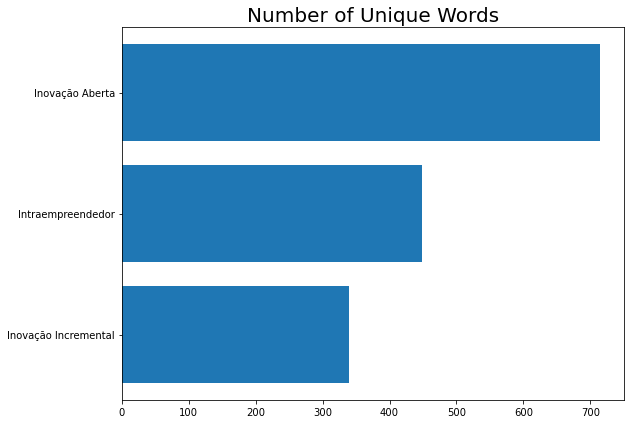

In [ ]:
# plotar nossas descobertas
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.assunto)
plt.title('Number of Unique Words', fontsize=20)


plt.tight_layout()
plt.show()